In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(linewidth=120)

<h3> 4a </h3>

In [2]:
''' Define my functions
    Note, A gaussian = 1, lorentzian = 0 '''

def gaussian(_A,_mu,_sigma,_x):
    return _A*np.exp(-(_x-_mu)**2/(2*(_sigma**2)))

def randgaussian(_A_max,_mu_pad,_sigma_max,_xmin,_xmax,_num_pts):
    _arr = np.zeros(_num_pts)
    _X = np.linspace(_xmin,_xmax,_num_pts)
    _A = np.random.uniform(low=_A_max*0.1,high=_A_max)
    _mu = np.random.uniform(low=_xmin+abs(_mu_pad),high=_xmax-abs(_mu_pad))
    _sigma = np.random.uniform(low=_sigma_max*0.1,high=_sigma_max)
    return gaussian(_A,_mu,_sigma,_X)

def cauchy(_A,_mu,_sigma,_x):
    return _A/(((_x-_mu)**2/_sigma**2)+1)

def randcauchy(_A_max,_mu_pad,_sigma_max,_xmin,_xmax,_num_pts):
    _arr = np.zeros(_num_pts)
    _X = np.linspace(_xmin,_xmax,_num_pts)
    _A = np.random.uniform(low=_A_max*0.1,high=_A_max)
    _mu = np.random.uniform(low=_xmin+abs(_mu_pad),high=_xmax-abs(_mu_pad))
    _sigma = np.random.uniform(low=_sigma_max*0.1,high=_sigma_max)
    return cauchy(_A,_mu,_sigma,_X)

def makedataset(_num_dist,_prob_gauss,_xmin,_xmax,_num_pts):
    _A_max = 1.0
    _mu_pad = 1.0
    _sigma_max = 1.0
    _X = np.linspace(_xmin,_xmax,_num_pts)
    _class = np.zeros(_num_dist)
    _Y = np.zeros((_num_dist,_num_pts))
    for i in range(_num_dist):
        rnd = np.random.uniform(low=0.,high=1.)
        if (rnd < _prob_gauss):
            _class[i] = 1
            _Y[i,:] = randgaussian(_A_max,_mu_pad,_sigma_max,_xmin,_xmax,_num_pts)
        else:
            _class[i] = 0
            _Y[i,:] = randcauchy(_A_max,_mu_pad,_sigma_max,_xmin,_xmax,_num_pts)
    return _Y,_class


In [3]:
# Build the dataset
num_pts = 200
num_dist = 10000
ratio_gauss = 0.5
x_low = -5
x_high = 5

X,Y = makedataset(num_dist,ratio_gauss,x_low,x_high,num_pts)

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.999)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.99)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.9)

<h3> 4b </h3>

In [4]:
#Build a model
model = keras.Sequential(
[
    layers.Dense(100,input_shape=(num_pts,),activation='relu'),
    layers.Dense(10,activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# model.summary()
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [5]:
# Run it
# train on 10
batch_size = 10
epochs = 30
training_history1 = {}
training_history1['test'] = model.fit(x_train1,y_train1, epochs=epochs,validation_data=(x_test1,y_test1), verbose=0)

#train on 100
batch_size = 20
epochs = 30
training_history2 = {}
training_history2['test'] = model.fit(x_train2,y_train2, epochs=epochs,validation_data=(x_test2,y_test2), verbose=0)

#train on 1000
batch_size = 100
epochs = 30
training_history3 = {}
training_history3['test'] = model.fit(x_train3,y_train3, epochs=epochs,validation_data=(x_test3,y_test3), verbose=0)


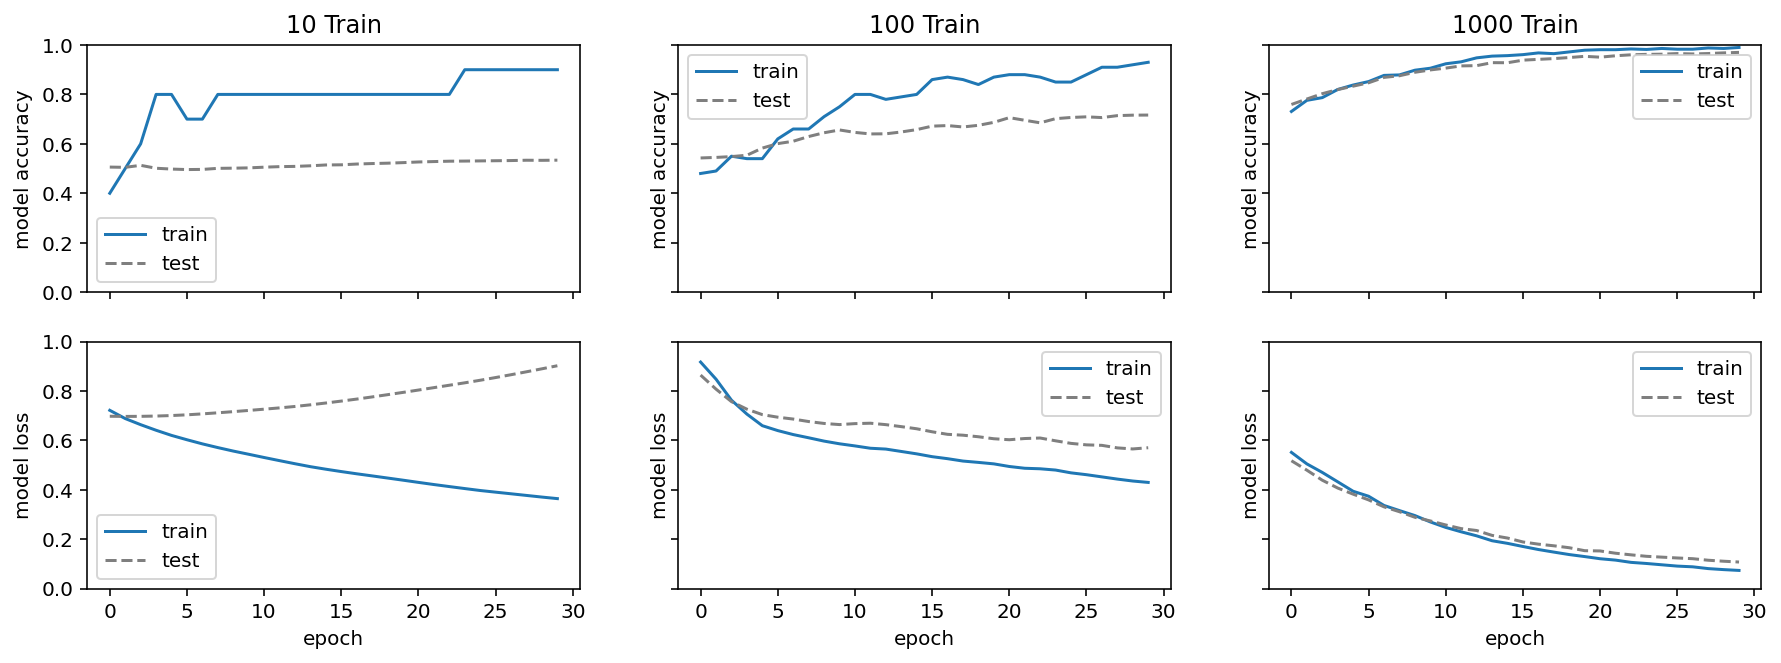

In [6]:
# look into training history
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig,ax = plt.subplots(2,3, sharex=True, sharey=True, figsize=(15,5))

# summarize history for accuracy
ax[0,0].plot(training_history1['test'].history['accuracy'])
ax[0,0].plot(training_history1['test'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0,0].set_ylabel('model accuracy')
ax[0,0].legend(['train', 'test'], loc='best')
ax[0,0].set_title("10 Train")
ax[0,0].set_ylim(0,1)

# summarize history for loss
ax[1,0].plot(training_history1['test'].history['loss'])
ax[1,0].plot(training_history1['test'].history['val_loss'], ls='--', color=colors[-3])
ax[1,0].set_ylabel('model loss')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='best')

# summarize history for accuracy
ax[0,1].plot(training_history2['test'].history['accuracy'])
ax[0,1].plot(training_history2['test'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0,1].set_ylabel('model accuracy')
ax[0,1].legend(['train', 'test'], loc='best')
ax[0,1].set_title("100 Train")
ax[0,1].set_ylim(0,1)

# summarize history for loss
ax[1,1].plot(training_history2['test'].history['loss'])
ax[1,1].plot(training_history2['test'].history['val_loss'], ls='--', color=colors[-3])
ax[1,1].set_ylabel('model loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='best')

# summarize history for accuracy
ax[0,2].plot(training_history3['test'].history['accuracy'])
ax[0,2].plot(training_history3['test'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0,2].set_ylabel('model accuracy')
ax[0,2].legend(['train', 'test'], loc='best')
ax[0,2].set_title("1000 Train")
ax[0,2].set_ylim(0,1)

# summarize history for loss
ax[1,2].plot(training_history3['test'].history['loss'])
ax[1,2].plot(training_history3['test'].history['val_loss'], ls='--', color=colors[-3])
ax[1,2].set_ylabel('model loss')
ax[1,2].set_xlabel('epoch')
ax[1,2].legend(['train', 'test'], loc='best');

In [7]:
# evaluate model
score = model.evaluate(x_test3, y_test3, verbose=2)

predictions = np.zeros(X.shape[0],dtype=int)
predictions[np.where(model(X)>=0.5)[0]] = 1

mistakes = np.where(Y != predictions)[0]
num_mistakes = len(mistakes)

print(f'Num. Mistakes = {num_mistakes} of 9000,',round(100*num_mistakes/9000,1),"%")

282/282 - 0s - loss: 0.1076 - accuracy: 0.9701
Num. Mistakes = 275 of 9000, 3.1 %


<h3> 4c </h3>

In [8]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='newton-cg')
logReg.fit(x_train3, y_train3)
score = logReg.score(x_test3,y_test3)
num_mistakes = int(round(num_dist*(1.-score)))
print(f'Num. Mistakes = {num_mistakes} of 9000,',round(100*num_mistakes/9000,1),"%")

Num. Mistakes = 3462 of 9000, 38.5 %
